## 1. Manual 
1. Manually downloaded 100 Background () images
2. Manually downloaded 100 object () images
3. All 100 object images were manually converted with transparent background

## 2. Steps

1. Resize the object image to say 50x50?
2. Save foreground images?
3. Create mask and save mask images 



In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

(183, 275, 4)


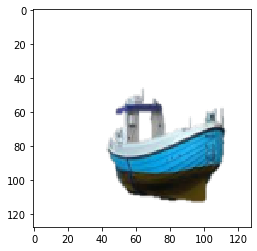

In [560]:
inputforgrnd = 'b0017.png'
inputbckgrnd = 'beach1.jpg'

forgrndImg = cv2.imread('./boat_alpha/'+ inputforgrnd , -1) # Specify -1 to get all channels
print(forgrndImg.shape)
forgrndImg = cv2.resize(forgrndImg, (128,128), interpolation = cv2.INTER_AREA)
plt.imshow(forgrndImg)

Foreground object image shape : (128, 128)


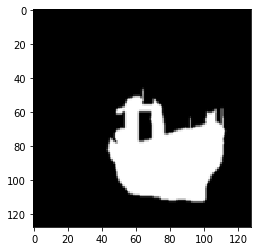

In [548]:
forgrndBGR = forgrndImg[:,:,:3] # Getting first 3 BGR channels

forgrndMask = forgrndImg[:,:,3] # Taking 4th Alpha channel only
plt.imshow(forgrndMask, cmap='gray')
print('Foreground object image shape : {}'.format(forgrndMask.shape))

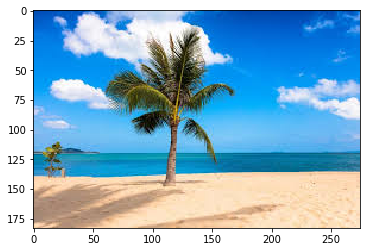

In [561]:
bckgrndImg = cv2.imread('./beach/'+inputbckgrnd,)
#img = cv2.resize(img, (50,50), interpolation = cv2.INTER_AREA)
plt.imshow(bckgrndImg[:,:,::-1])

In [550]:
bckgrndImgCopy = bckgrndImg.copy()

In [551]:
# Making the dimensions of the mask (object foreground image mask) same as the background image
forgrndMask3ch = cv2.merge((forgrndMask, forgrndMask, forgrndMask)) # Making 3 channels

# Make the values [0,1] since we are using arithmetic operations
forgrndMask3ch = np.uint8(forgrndMask3ch/255)

Bankground Image Size : (183, 275, 3)
Random X :3
Random Y :16
img ROI size :(128, 128, 3)
iForeground Mask image size :(128, 128, 3)


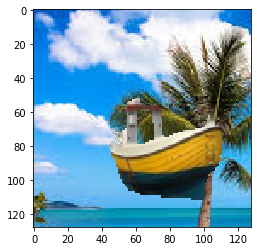

In [552]:
##### Get 20 random place 
rndX = random.randint(0,bckgrndImgCopy.shape[0] - 130)
rndY = random.randint(0,bckgrndImgCopy.shape[1]- 130)

print('Bankground Image Size : {}'.format(bckgrndImgCopy.shape))
print('Random X :{}'.format(rndX))
print('Random Y :{}'.format(rndY))

# Get the region from the image, based on random place : 
# This is actual ROI where we gonna replace with object image across all 3 channels
bckgrndSubImg = bckgrndImgCopy[rndX:(rndX+128), rndY:(rndY+128)]
print('img ROI size :{}'.format(bckgrndSubImg.shape))
print('iForeground Mask image size :{}'.format(forgrndMask3ch.shape))

# Use the mask to create the masked object region in rectangle/square format
# To make empty subsetImage of background
bckgrndMaskedEmptySubImg = cv2.multiply(bckgrndSubImg, (1-forgrndMask3ch)) 

#Foreground object (3 channel BGR image) & Foreground mask(3 channel 0s & 1s)  merged
forgrndMasked = cv2.multiply(forgrndBGR, forgrndMask3ch) 

tableFinalROI = cv2.add(bckgrndMaskedEmptySubImg, forgrndMasked)
#plt.imshow(bckgrndMaskedEmptySubImg[:,:,::-1])
#plt.imshow(forgrndMasked[:,:,::-1])
plt.imshow(tableFinalROI[:,:,::-1])

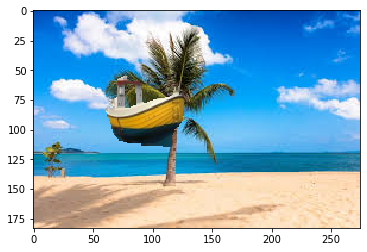

In [553]:
bckgrndImgCopy[rndX:(rndX+128), rndY:(rndY+128)] = tableFinalROI

plt.imshow(bckgrndImgCopy[:,:,::-1])

In [554]:
bckgrndImgCopyMask = np.zeros_like(bckgrndImgCopy[:,:,0])

In [555]:
bckgrndImgCopyMask.shape

(183, 275)

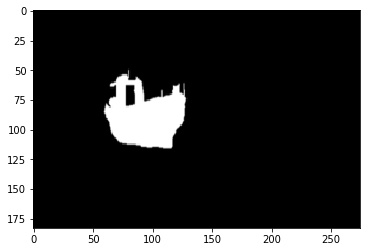

In [556]:
bckgrndImgCopyMask[rndX:(rndX+128), rndY:(rndY+128)] = forgrndMask
plt.imshow(bckgrndImgCopyMask, cmap='gray')

# SAVE AS JPG OR PNG : MAKE SAME CHANGES TO test.py

# All final images should have same dimensions

In [557]:
bckgrndImgCopy = cv2.resize(bckgrndImgCopy, (640,480), interpolation = cv2.INTER_AREA)
bckgrndImgCopyMask = cv2.resize(bckgrndImgCopy, (640,480), interpolation = cv2.INTER_AREA)

In [558]:
i=i+1

# Save Boat Mask Image
cv2.imwrite('./boat_mask/'+inputforgrnd, forgrndMask)

# Save Beach Boat Image
cv2.imwrite('./beach_boat/'+ str(i) +inputbckgrnd, bckgrndImgCopy)

# Save Beach Boat Mask Image
cv2.imwrite('./beach_boat_mask/'+str(i)+ inputbckgrnd, bckgrndImgCopyMask)

True

In [534]:
#def imagePreprocess(bckgrndImg, forgrndImg, )

In [497]:
#i=1

In [ ]:
plt